<a href="https://colab.research.google.com/github/Shubham-90s/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/creditcard_2023.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.shape

(568630, 31)

In [ ]:
(df.isnull().sum()/len(df)*100)

id        0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

#### No null values are present in the data

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


#### Data is balanced as both fraudulent and non fraudulent transactions are 50-50%.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

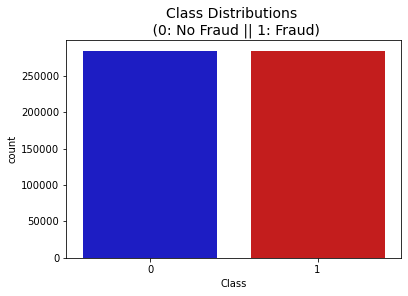

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

<AxesSubplot:xlabel='Amount', ylabel='Count'>

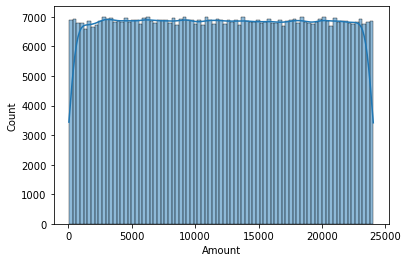

In [ ]:
import seaborn as sns

# To create a histogram with a KDE overlay
sns.histplot(df['Amount'], kde=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


In [ ]:
df['Amount'].head()

0    0.858447
1   -0.796369
2   -1.377011
3   -0.962119
4    0.323285
Name: Amount, dtype: float64

In [ ]:
df=df.drop('id',axis=1)

<AxesSubplot:>

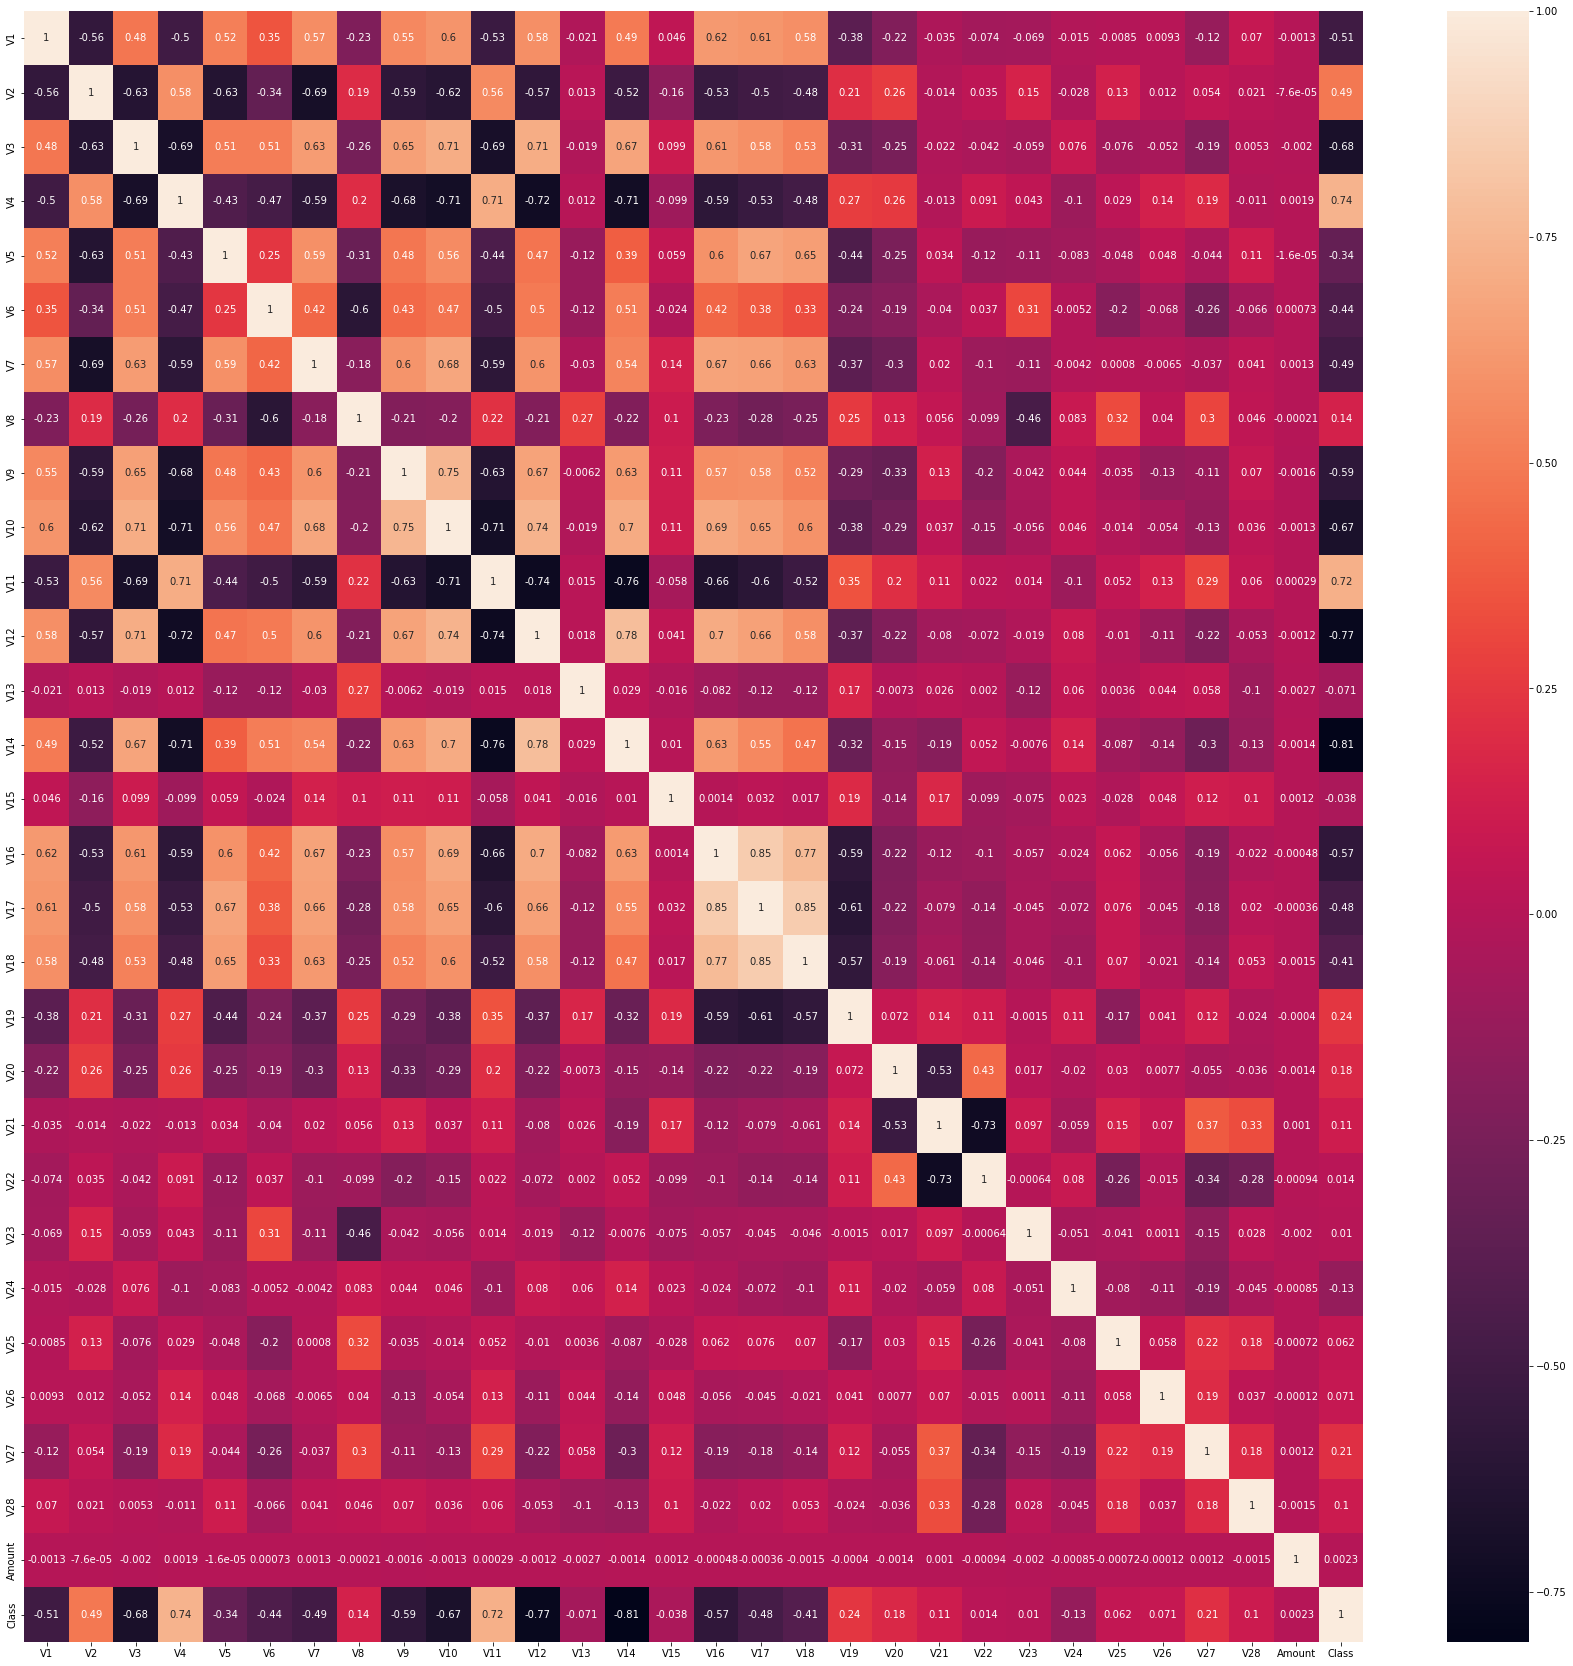

In [ ]:
corr=df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr,annot=True)

we have found correlation using heatmap

In [ ]:
correlation_with_target = df.corrwith(df['Class']).abs()

correlation_with_target

id        0.864283
V1        0.505761
V2        0.491878
V3        0.682095
V4        0.735981
V5        0.338639
V6        0.435088
V7        0.491234
V8        0.144294
V9        0.585522
V10       0.673665
V11       0.724278
V12       0.768579
V13       0.071105
V14       0.805669
V15       0.037948
V16       0.573511
V17       0.476377
V18       0.410091
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24       0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
Class     1.000000
dtype: float64

we found out absolute correlation with class variable

In [ ]:
correlation_with_target>0.5

V1         True
V2        False
V3         True
V4         True
V5        False
V6        False
V7        False
V8        False
V9         True
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class      True
dtype: bool

In [ ]:
x=df[['V1','V3','V4','V9','V10','V11','V12','V14','V16']]

y=df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.9576457181445996

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[69257,  1599],
       [ 4422, 66880]], dtype=int64)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy', random_state=0)
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred1=dc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.9973480212158303

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(random_state=1)
model2.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred2=model2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9995497967050746

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gb_clf.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_pred3=gb_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.9683732185314932

## ANN

In [ ]:
import keras
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#initializing the ANN
ann = tf.keras.models.Sequential()

In [ ]:
#Adding Input layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#Adding second hidden line
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#Compile the ANN
ann.compile(optimizer='adam',
           loss= 'binary_crossentropy',
           metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train, batch_size=100, epochs=10)

Epoch 1/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9696
Epoch 2/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9695
Epoch 3/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9695
Epoch 4/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9696
Epoch 5/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9696
Epoch 6/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0713 - accuracy: 0.9696
Epoch 7/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9695
Epoch 8/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9696
Epoch 9/10
4265/4265 [==============================] - 13s 3ms/step - loss: 0.0714 - accuracy: 0.9696
Epoch 10/10
4265/4265 [==============================] - 13s 3ms/step - l

## Checking for 0.3 threshold value

In [ ]:
correlation_with_target>0.3

id         True
V1         True
V2         True
V3         True
V4         True
V5         True
V6         True
V7         True
V8        False
V9         True
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18        True
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class      True
dtype: bool

In [ ]:
x=df[['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11','V12','V14','V16','V17','V18']]
y=df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred4=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred4)

0.9641711950946427

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy', random_state=0)
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred5=dc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.9979717332301614

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100 ,criterion ='gini', random_state=1)
model2.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred6=model2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.9998417248474404

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_pred7=gb_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred7)

0.9745821829074559

In [ ]:
result = pd.DataFrame({
    'Models_for_0.5':['Logistic_Regression','Decision Tree','Random Forest','Gradient Boosting','ANN'],
    'Score':[0.95,0.99,0.99,0.96,0.96]
})

In [ ]:
result

,Models_for_0.5,Score
0,Logistic_Regression,0.95
1,Decision Tree,0.99
2,Random Forest,0.99
3,Gradient Boosting,0.96
4,ANN,0.96


In [ ]:
result1 = pd.DataFrame({
    'Models_for_0.3':['Logistic_Regression','Decision Tree','Random Forest','Gradient Boosting'],
    'Score':[0.96,0.99,0.99,0.97]
})

In [ ]:
result1

,Models_for_0.3,Score
0,Logistic_Regression,0.96
1,Decision Tree,0.99
2,Random Forest,0.99
3,Gradient Boosting,0.97


After doing EDA on given credit card transactions data we noticed that, data is balanced as both fraudulent and genuine transactions were 50%.

We found out accuracy for both 0.5 and 0.3 threshold values and we are getting accuracy more than 95%.
Overall, the case study showed that the models can be used to effectively classify fraudulent transacations.